In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# **Dataset Loading**

In [ ]:
X_path = '/content/drive/MyDrive/EN.553.602DataMiningSpring2024/dataset/Complete/complete_data_X.npy'
y_path = '/content/drive/MyDrive/EN.553.602DataMiningSpring2024/dataset/Complete/complete_data_y.npy'

In [ ]:
# Load data
X = np.load(X_path, allow_pickle=True)
y = np.load(y_path, allow_pickle=True)

In [ ]:
print(X.shape)
print(y.shape)

(900, 204, 1295)
(900,)


In [ ]:
X_data = np.load(X_path)

# Now X_data contains the data from the complete_data_X.npy file
print(X_data[0])
print(X_data[0].shape)

for i in range(1, 5):
    print(X_data[i].shape)

[[6.44655764e-01 5.05132914e-01 6.53408408e-01 ... 5.98390520e-01
  1.00000000e+00 1.00000000e+00]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 1.00000000e+00
  7.55583405e-01 5.81244946e-01]
 [6.89371526e-01 4.10801083e-01 3.88938636e-01 ... 2.58871913e-01
  1.87606901e-01 2.55329669e-01]
 ...
 [2.81673949e-02 3.34165432e-02 3.51307942e-02 ... 2.65751220e-03
  1.62420683e-02 2.27241227e-02]
 [6.54296875e-02 8.78906250e-02 1.14257812e-01 ... 2.19726562e-01
  2.25585938e-01 1.83593750e-01]
 [1.29199219e+02 1.29199219e+02 1.29199219e+02 ... 1.29199219e+02
  1.29199219e+02 1.29199219e+02]]
(204, 1295)
(204, 1295)
(204, 1295)
(204, 1295)
(204, 1295)


In [ ]:
first_clip_features = X_data[0, :, :]
print(first_clip_features.shape)

(204, 1295)


In [ ]:
# Extract the features for all audio clips
features = [X_data[i, :, :] for i in range(X_data.shape[0])]

In [ ]:
X.shape

(900, 264180)

In [ ]:
X_data.shape

(900, 204, 1295)

In [ ]:
y.shape

(900,)

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

# **SVM**

In [ ]:
# StandardScaler expected <= 2
# Flatten the last two dimensions:
X_flattened = X.reshape(X.shape[0], -1)

# Then you can scale and split the data as before
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_flattened)

y = y.astype(int)  # Convert y to integer type
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the SVM as previously shown
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

# Evaluate the classifier
predictions = svm_classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions))


Accuracy: 0.6277777777777778

Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.74      0.67        46
           1       0.80      0.77      0.79        48
           2       0.58      0.33      0.42        46
           3       0.52      0.68      0.59        40

    accuracy                           0.63       180
   macro avg       0.63      0.63      0.61       180
weighted avg       0.63      0.63      0.62       180



# **Random Forest**

In [ ]:
X = X.reshape(X.shape[0], -1)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

y = y.astype(int)  # Convert y to integer type
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

# Initialize the RandomForest classifier
rf_classifier = RandomForestClassifier(n_estimators=50, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict the labels on the test dataset
predictions = rf_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions))

Accuracy: 0.56

Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.65      0.55        55
           1       0.83      0.58      0.68        65
           2       0.42      0.31      0.36        55
           3       0.55      0.70      0.61        50

    accuracy                           0.56       225
   macro avg       0.57      0.56      0.55       225
weighted avg       0.58      0.56      0.56       225



# **Logistic Regression**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
log_reg = LogisticRegression(max_iter=1000)  # Increase max_iter if convergence warning appears

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions on the test set
predictions = log_reg.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions))

Accuracy: 0.6333333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.65      0.65        46
           1       0.80      0.85      0.83        48
           2       0.54      0.30      0.39        46
           3       0.52      0.72      0.60        40

    accuracy                           0.63       180
   macro avg       0.62      0.63      0.62       180
weighted avg       0.63      0.63      0.62       180



# **Classifier Analysis**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.preprocessing import label_binarize

/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


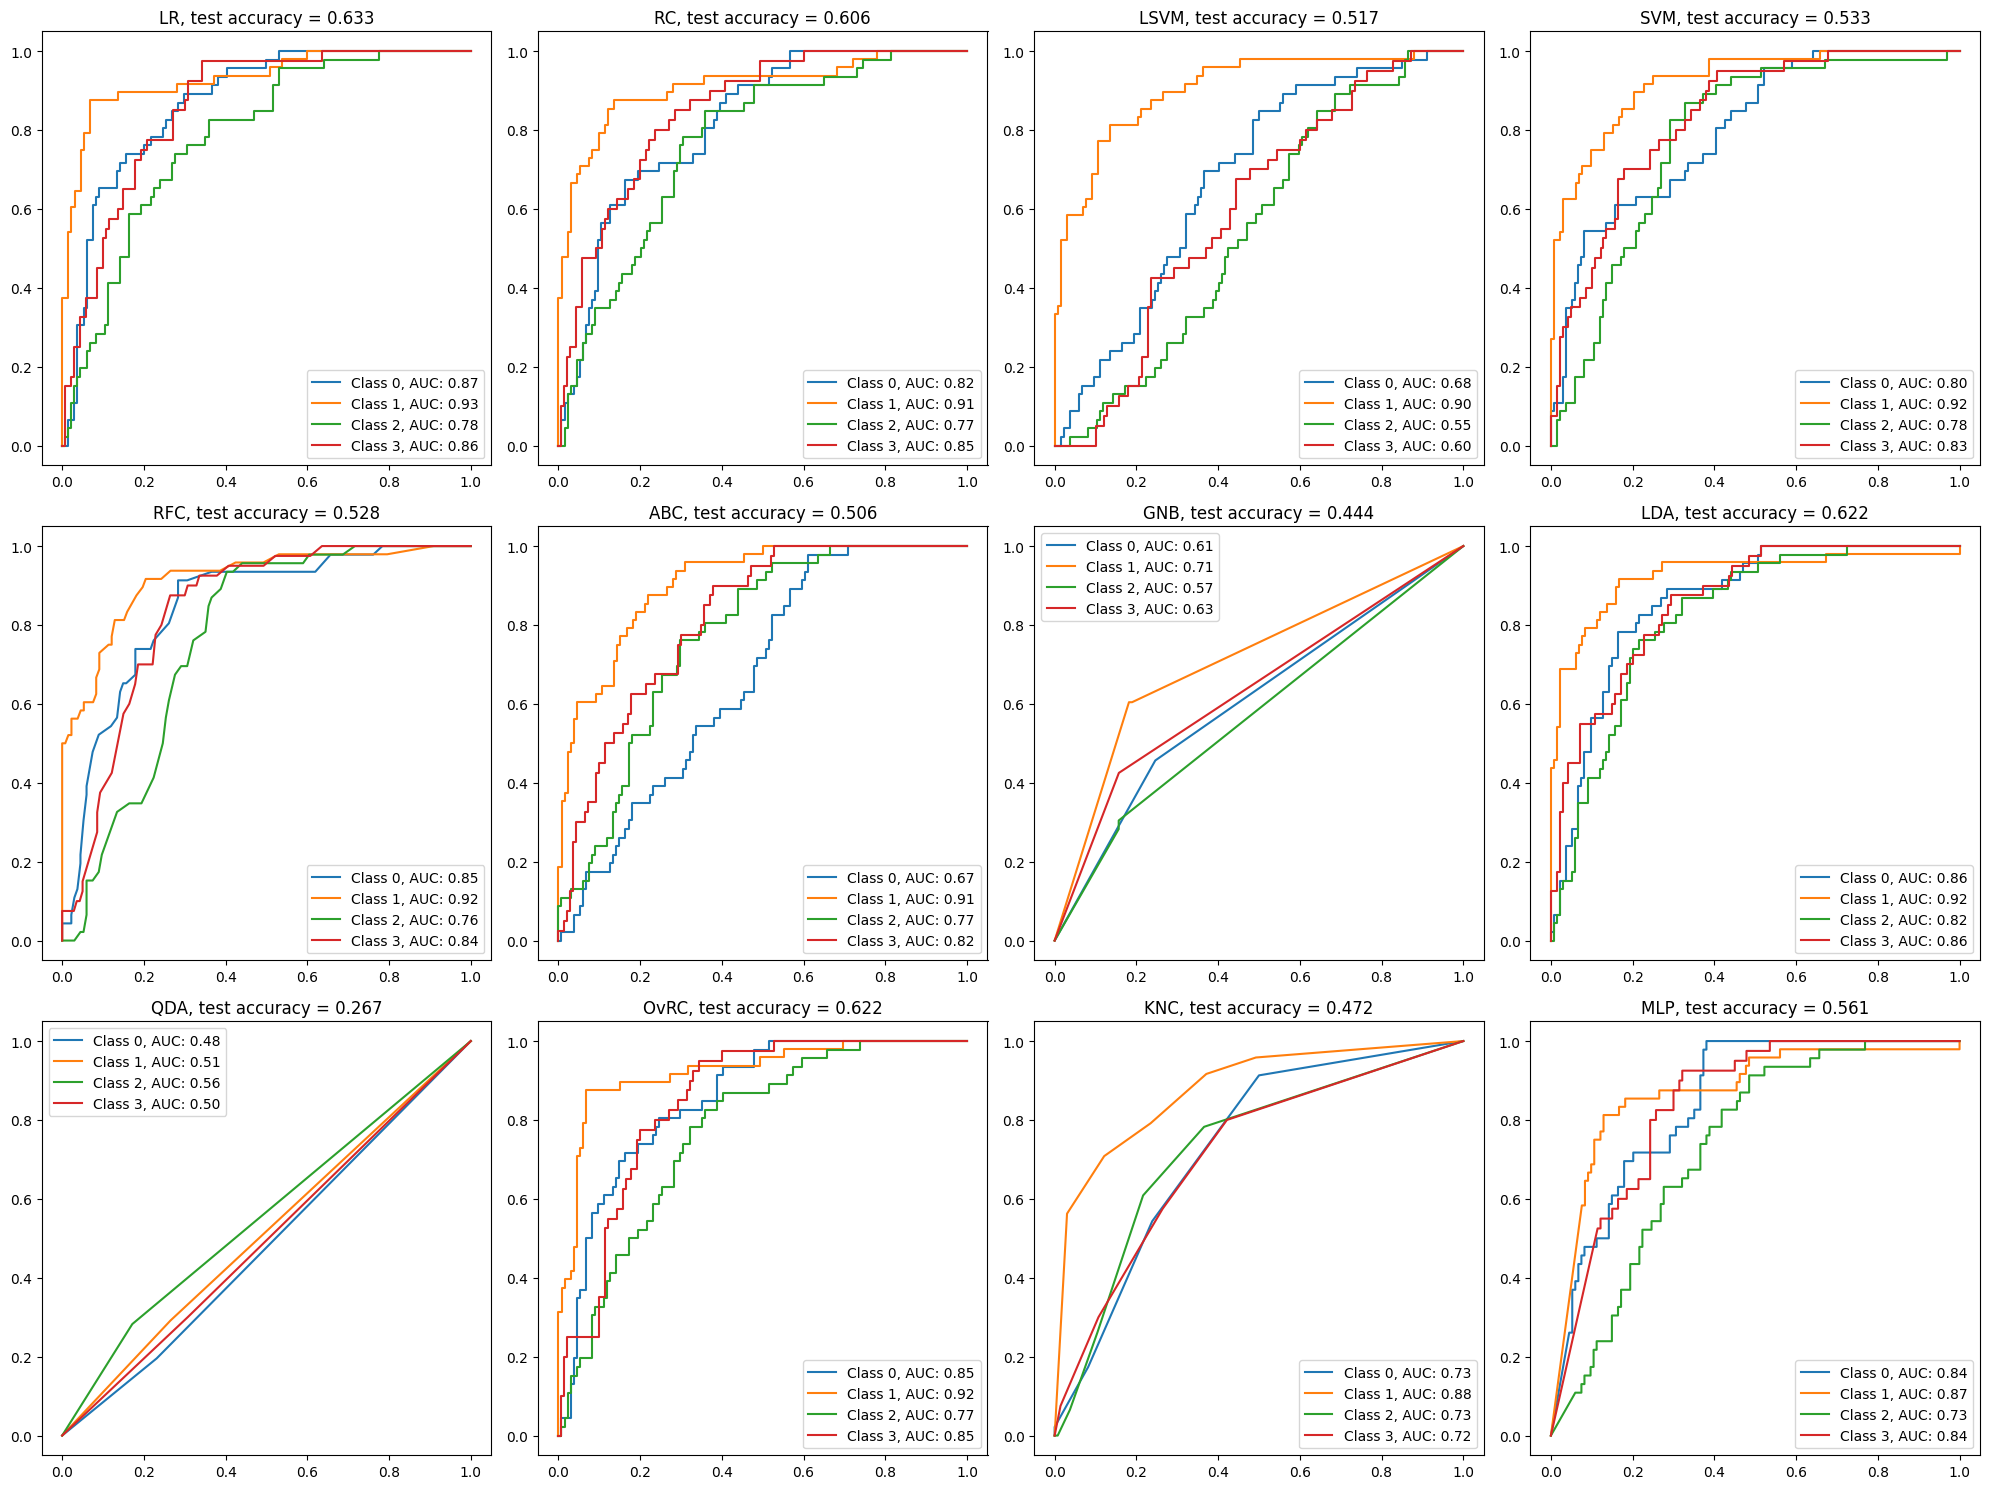

In [ ]:


# Initialize classifiers
# 在多分类器字典中更新逻辑回归分类器的配置
classifiers = {
    "LR": LogisticRegression(max_iter=1000),  # 提高迭代次数
    "RC": RidgeClassifier(),
    "LSVM": LinearSVC(),
    "SVM": SVC(probability=True),
    "RFC": RandomForestClassifier(),
    "ABC": AdaBoostClassifier(),
    "GNB": GaussianNB(),
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis(),
    "OvRC": OneVsRestClassifier(LogisticRegression(max_iter=1000)),  # 也更新OvRC中的逻辑回归
    "KNC": KNeighborsClassifier(),
    "MLP": MLPClassifier()
}


# Binarize the y_test for ROC calculation
y_test_binarized = label_binarize(y_test, classes=np.unique(y))

n_genres = len(np.unique(y))
score = dict()
fpr = dict()
tpr = dict()
roc_auc = dict()
confusion_mats = dict()

# Iterate over classifiers to train and evaluate
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    score[name] = clf.score(X_test, y_test)
    fpr[name], tpr[name], roc_auc[name] = {}, {}, {}
    confusion_mats[name] = np.zeros((n_genres, n_genres))

    # Compute ROC curve and ROC area for each class
    if name in ["LSVM", "SVM", "RC"]:
        y_score = clf.decision_function(X_test)
    else:
        y_score = clf.predict_proba(X_test)

    for i in range(n_genres):
        fpr[name][i], tpr[name][i], _ = metrics.roc_curve(y_test_binarized[:, i], y_score[:, i])
        roc_auc[name][i] = metrics.auc(fpr[name][i], tpr[name][i])

        # Confusion matrix for each class
        y_pred = clf.predict(X_test)
        for j in range(n_genres):
            confusion_mats[name][i, j] = np.sum((y_test == i) & (y_pred == j))

# Plotting
fig, axs = plt.subplots(3, 4, figsize=(20, 15))
for idx, (name, clf) in enumerate(classifiers.items()):
    for i in range(n_genres):
        axs[idx // 4, idx % 4].plot(fpr[name][i], tpr[name][i], label=f'Class {i}, AUC: {roc_auc[name][i]:.2f}')
    axs[idx // 4, idx % 4].set_title(f"{name}, test accuracy = {round(score[name], 3)}")
    axs[idx // 4, idx % 4].legend()

fig.tight_layout()
plt.show()


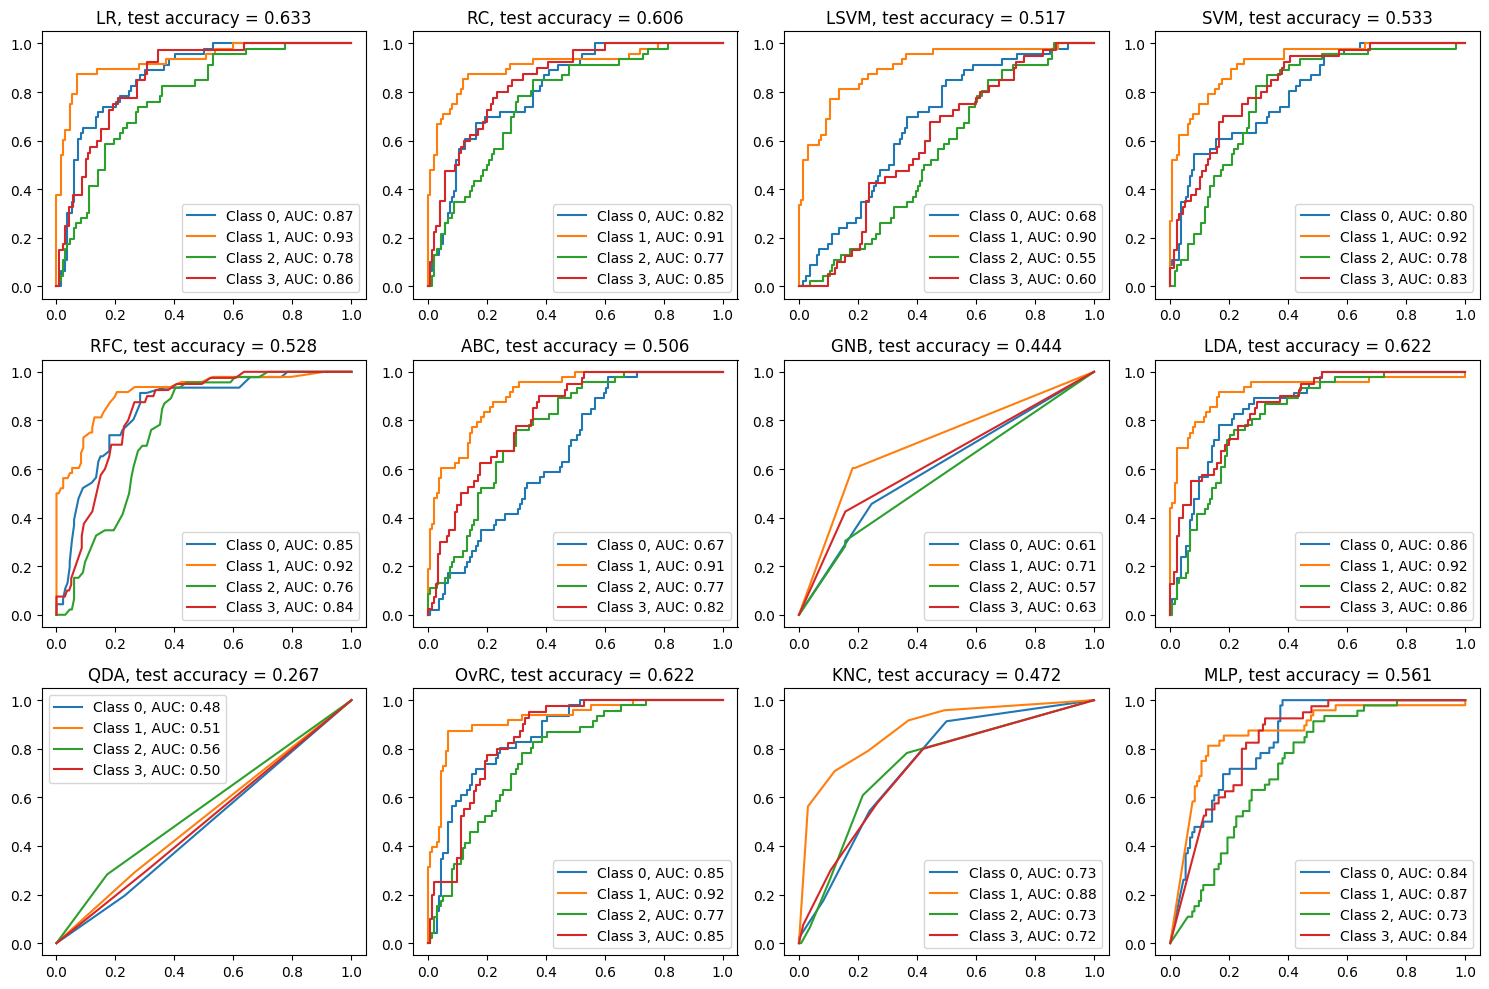

In [ ]:
fig, axs = plt.subplots(3, 4, figsize=(15, 10))
for idx, (name, clf) in enumerate(classifiers.items()):
    for i in range(n_genres):
        axs[idx // 4, idx % 4].plot(fpr[name][i], tpr[name][i], label=f'Class {i}, AUC: {roc_auc[name][i]:.2f}')
    axs[idx // 4, idx % 4].set_title(f"{name}, test accuracy = {round(score[name], 3)}")
    axs[idx // 4, idx % 4].legend()

fig.tight_layout()
plt.show()

# **Dataset Visulization**


In [ ]:
from sklearn.manifold import TSNE

In [ ]:
feature_length = 1295
num_features = 204
X_scaled_3d = X_scaled.reshape(-1, num_features, feature_length)

In [ ]:
if X_scaled.shape[1] == num_features * feature_length:
    X_scaled_3d = X_scaled.reshape(-1, num_features, feature_length)

    # Extracting the entire scaled features for the first feature across all audio clips
    scaled_features = X_scaled_3d[:, 0, :]
else:
    scaled_features = None

In [ ]:
scaled_features.shape

(900, 1295)

In [ ]:
embedded_features = TSNE(n_components=2).fit_transform(scaled_features)

In [ ]:
embedded_features.shape

(900, 2)

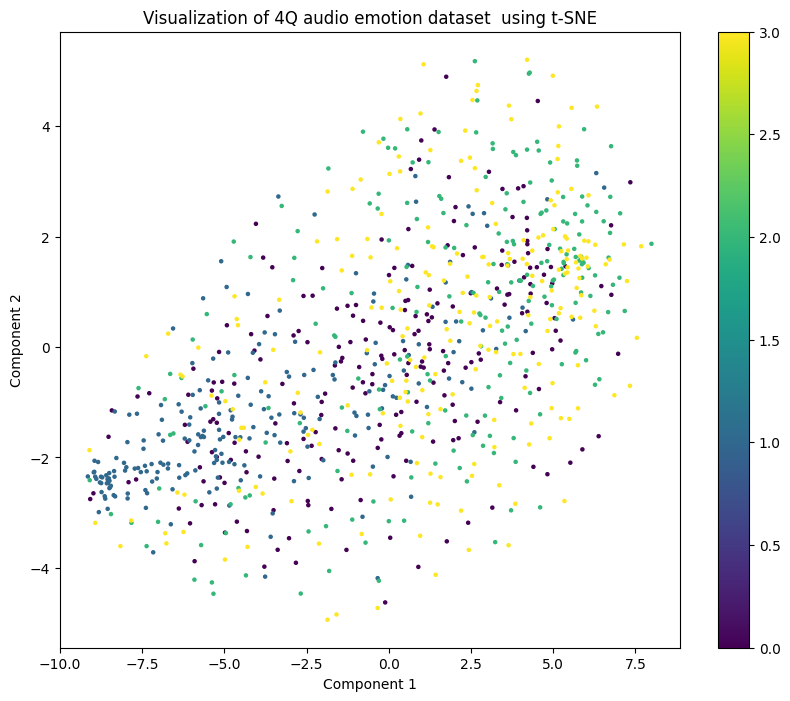

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(embedded_features[:, 0], embedded_features[:, 1], c=y, cmap='viridis', s=5)
plt.colorbar()
plt.title('Visualization of 4Q audio emotion dataset  using t-SNE')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()
